### PROBLEM STATEMENT

In this problem we have to predict the quality of the wine(good or not good) on the basis of physicochemical features provided to us.

In [32]:
#import packages for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

### DATA COLLECTION

In [34]:
#import dataset using Github link
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
#view top few rows
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [36]:
#check number of rows and columns present in dataset
df.shape

(1599, 12)

##### Out of these 12 variables, one is dependent(target variable) i.e, quality and all other are independent variable

In [37]:
#check number of columns present and their data type.
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [38]:
#check information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Here we can see there are  no null values

In [39]:
# describe each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Exploratory Data Analysis

In [40]:
#check unique values of quality column
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [41]:
df[["fixed acidity","quality"]]

,fixed acidity,quality
0,7.4,5
1,7.8,5
2,7.8,5
3,11.2,6
4,7.4,5
...,...,...
1594,6.2,5
1595,5.9,6
1596,6.3,6
1597,5.9,5


In [42]:
df["fixed acidity"].value_counts()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64

In [43]:
#check value count for each column
for i in df.columns:
    #print('##### ',i,' #####')
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

#### Univariate Analysis

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

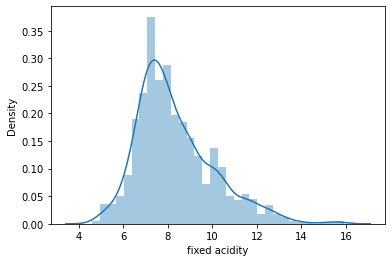

In [44]:
#display distribution of fixed acidity
sns.distplot(df['fixed acidity'])

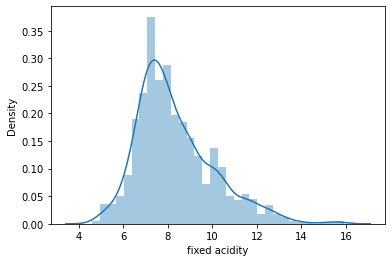

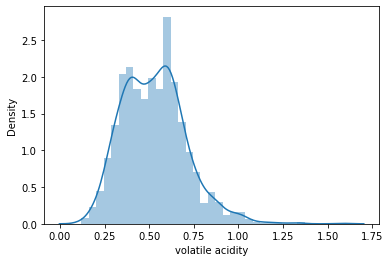

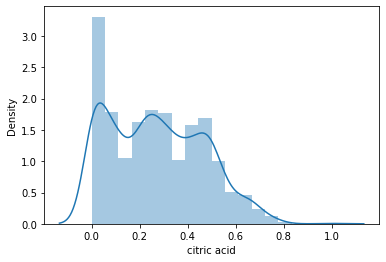

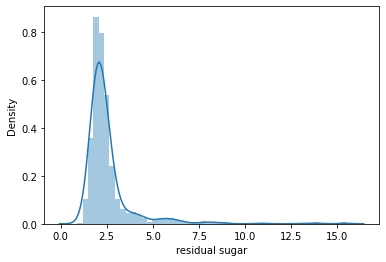

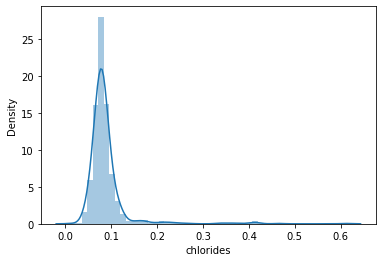

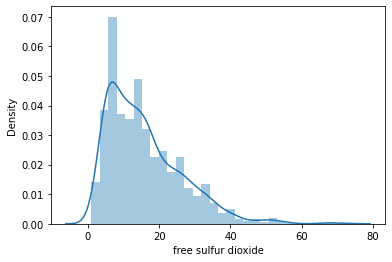

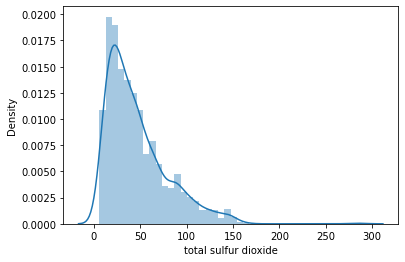

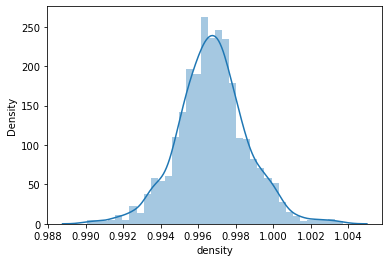

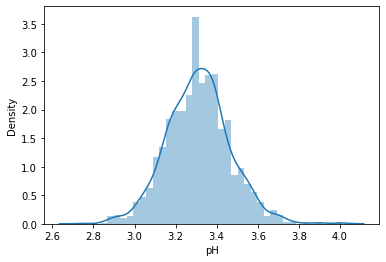

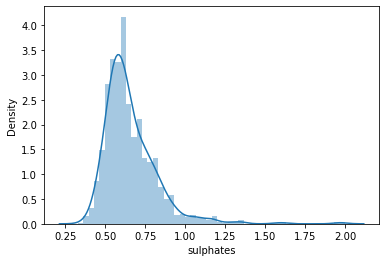

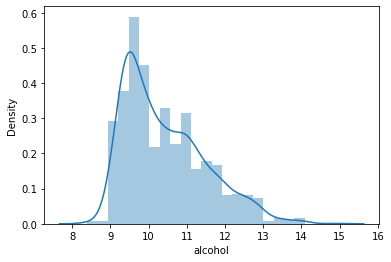

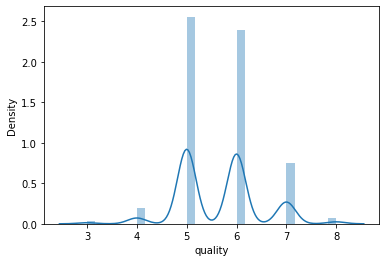

In [45]:
#Display distribution of all columns 
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

Density, PH and Fixed Acidity column are closer to a normal distribution. Rest column values are skewed.

#### Bivariate Analysis

In [46]:
# Create a quality categorical column. If quality is 7 or more assign "good" else "not good"
df["quality_category"]=np.where(df["quality"]<7,"not good","good")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,not good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,not good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,not good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,not good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,not good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,not good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,not good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,not good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,not good


In [47]:
# Check the value counts of quality_category column. This will tell us if the class is imbalanced or not.
df['quality_category'].value_counts()

not good    1382
good         217
Name: quality_category, dtype: int64

The class is imbalanced. We'll balance the classes later

<AxesSubplot:xlabel='fixed acidity', ylabel='quality_category'>

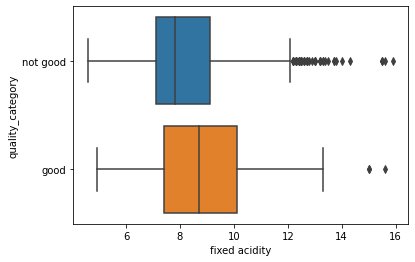

In [48]:
# Compare the value ranges of fixed acidity when the quality is "good" vs "not good"
sns.boxplot(x=df["fixed acidity"],y=df['quality_category'])

In [49]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_category'],
      dtype='object')

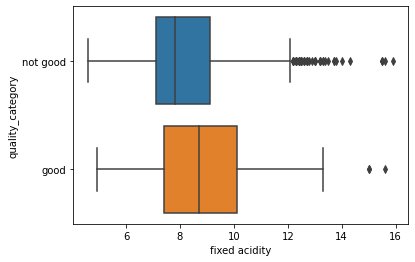

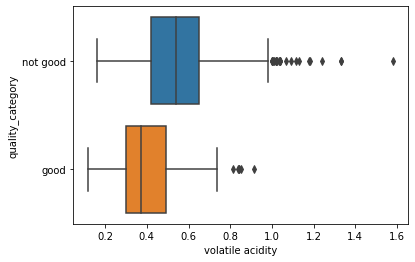

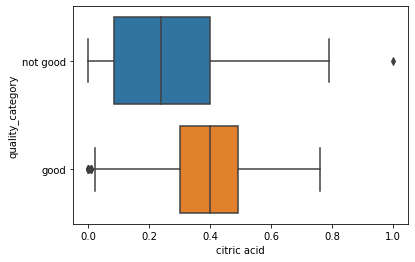

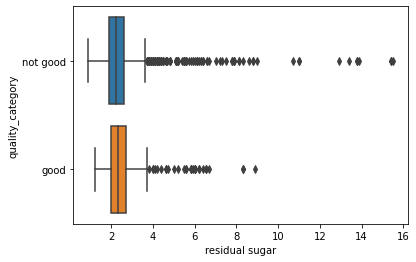

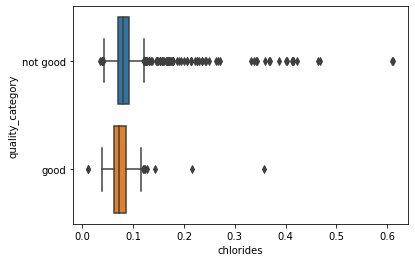

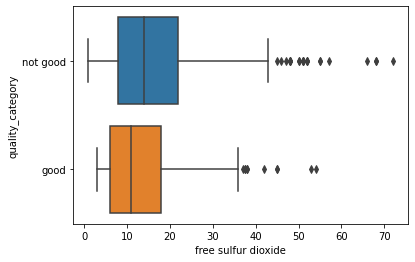

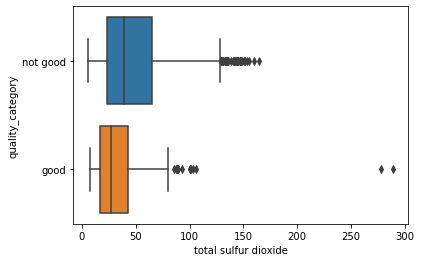

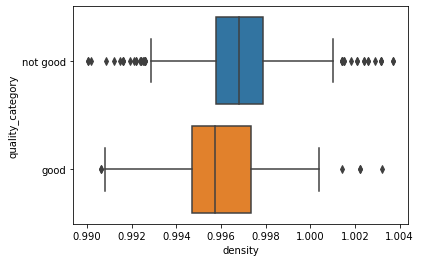

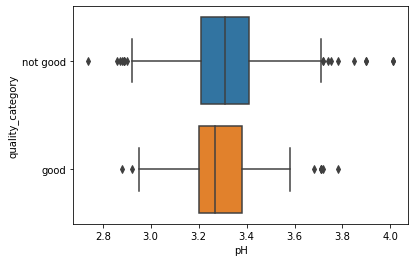

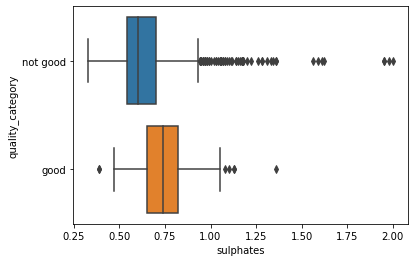

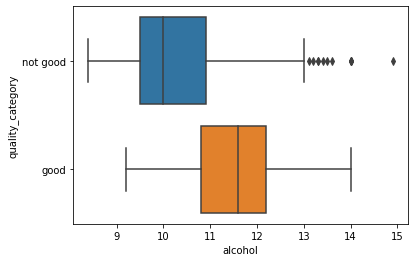

In [50]:
# Compare the value ranges of all columns when the quality is "good" vs "not good"
for i in df.columns[0:-2]:
    sns.boxplot(x=df[i],y=df['quality_category'])
    plt.show()

Based on the value range of citric acid and alcohol looks like they have some relation with the wine quality.

#### Multivariate Analysis

In [51]:
# Check the correlation of all the columns with each other
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

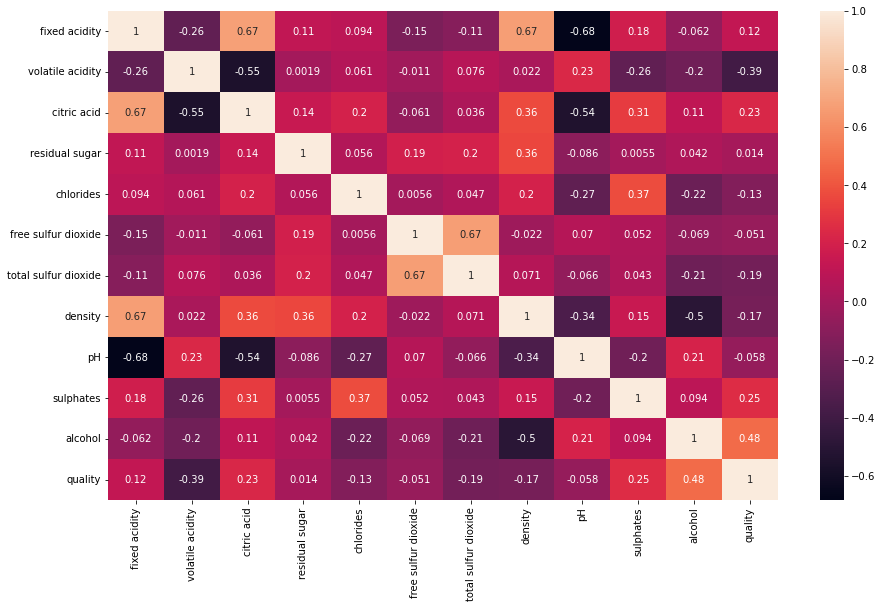

In [52]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

No single column has high correlation with the quality column.

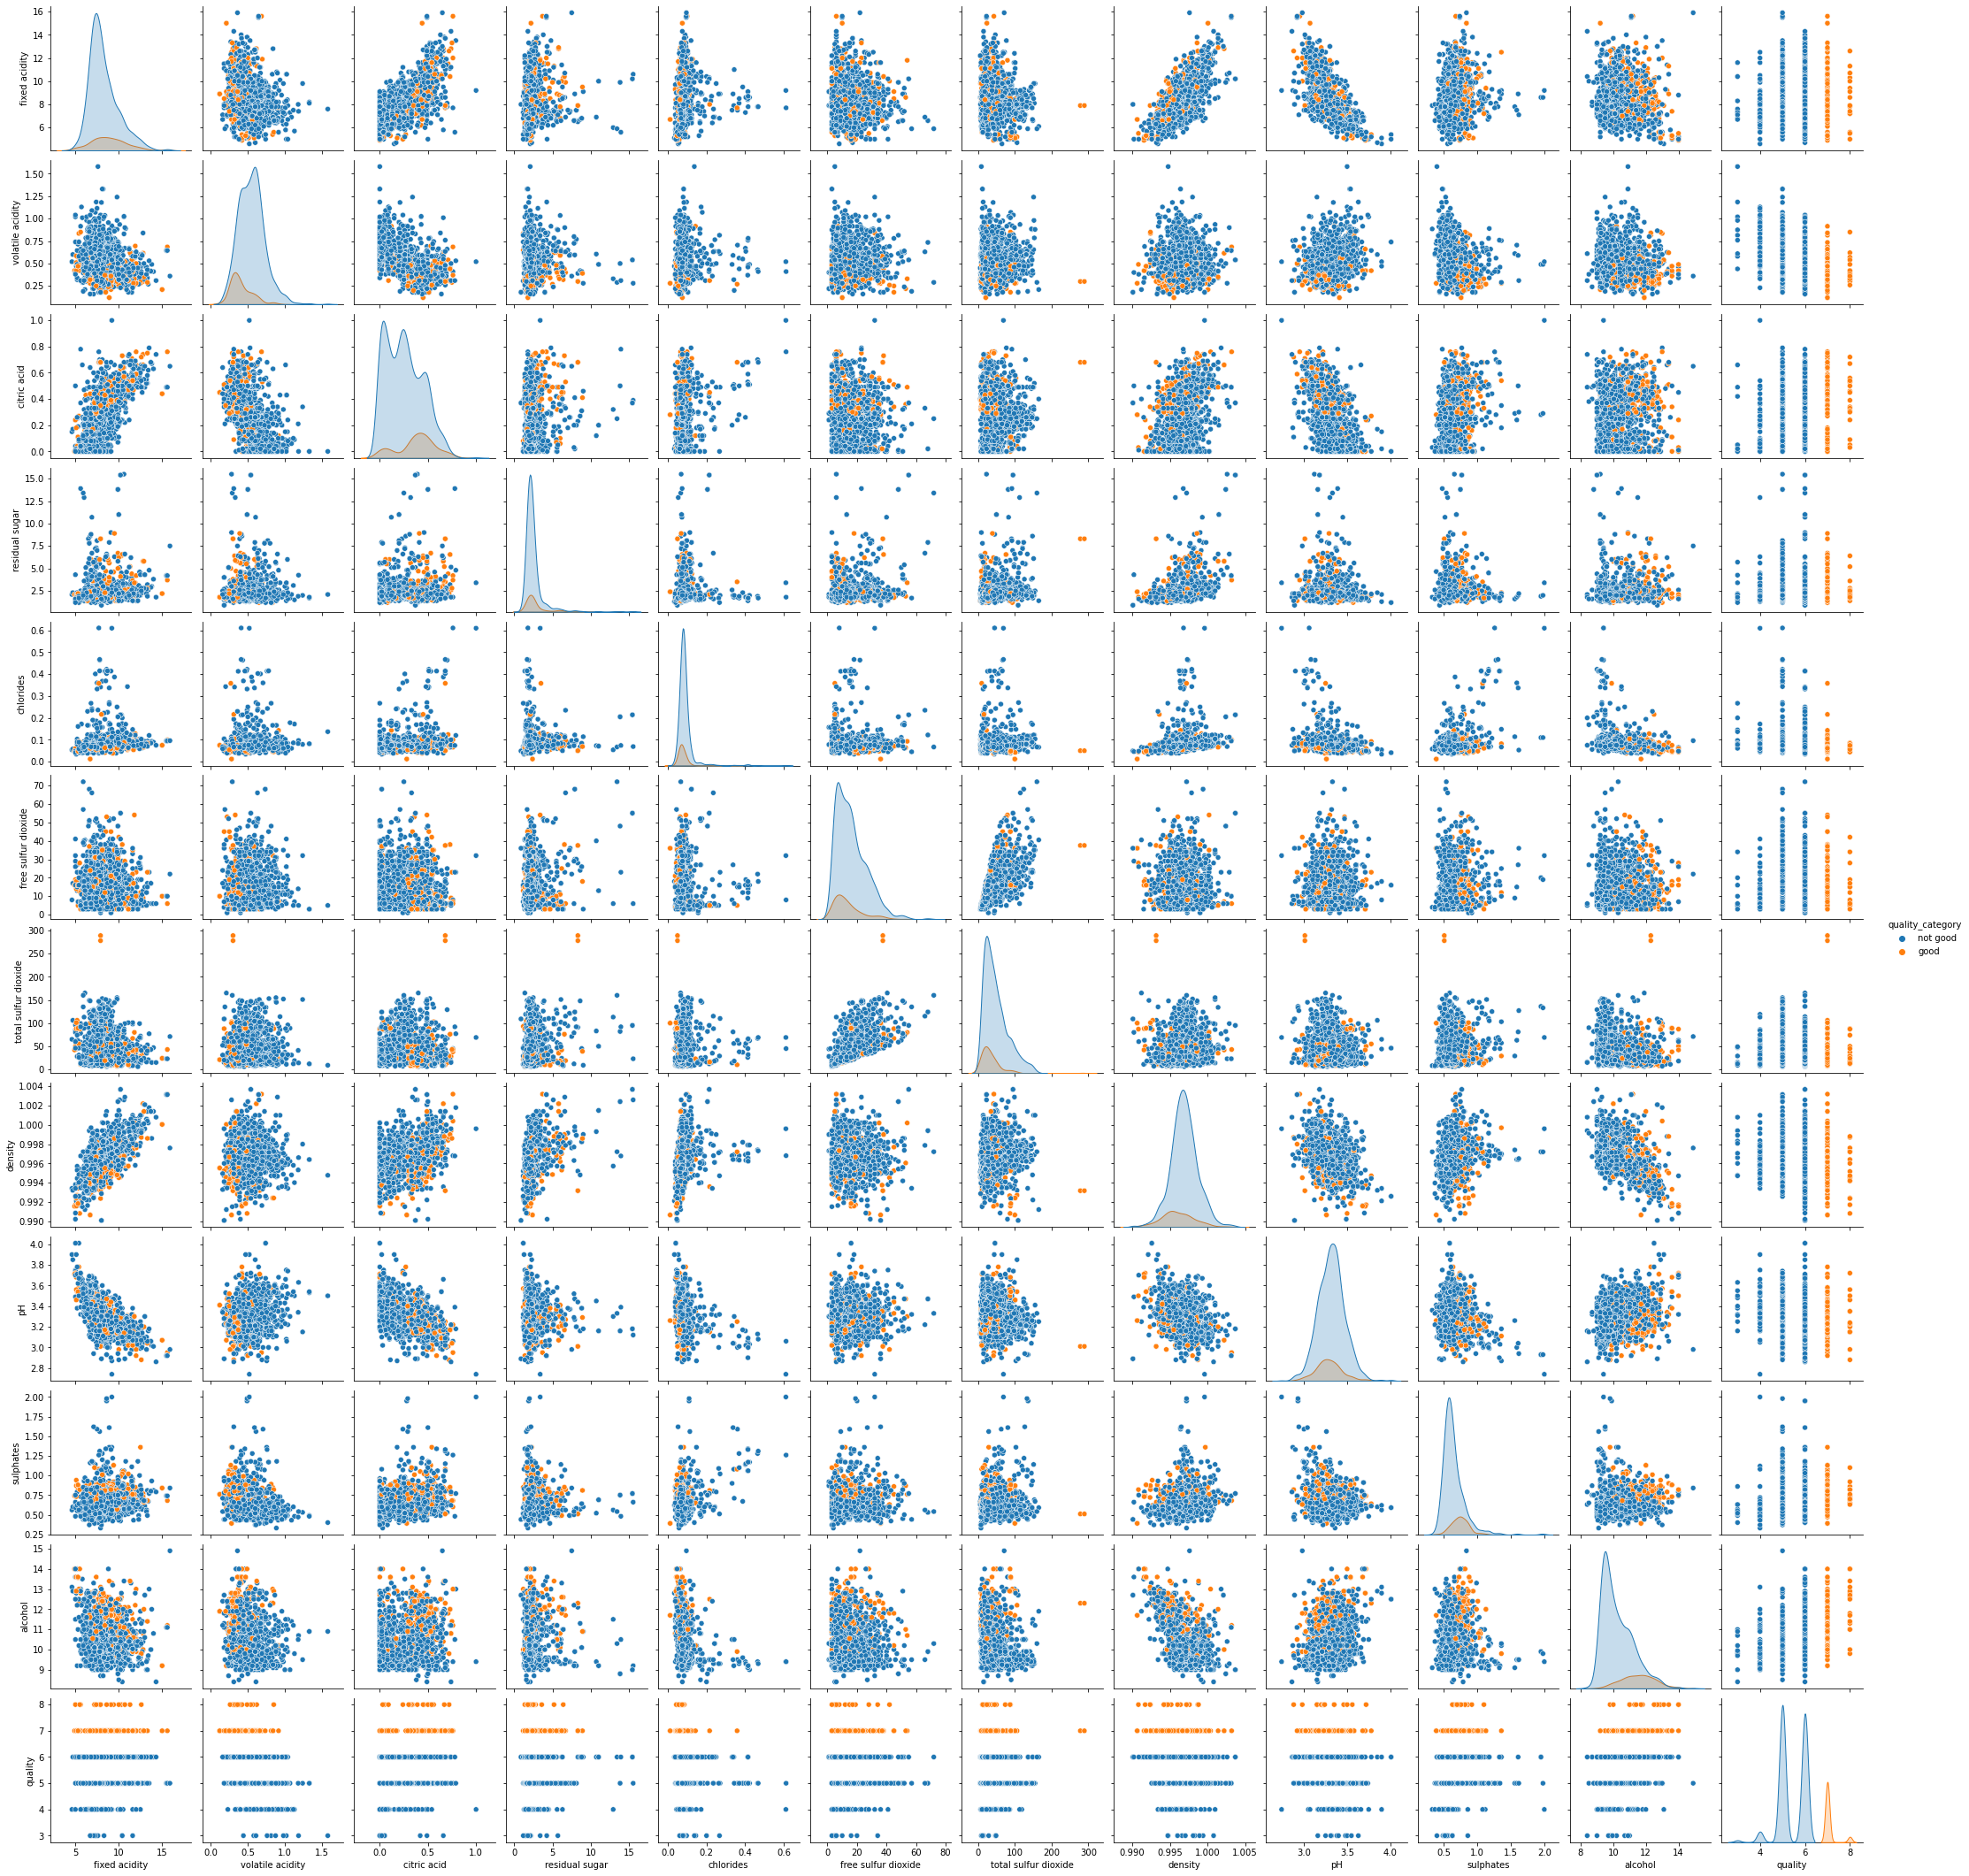

In [53]:
sns.pairplot(data=df,hue="quality_category")

### Feature Engineering

In [54]:
# Exclude the last 2 columns which are wine quality related and assign the rest which are the independent variables to X.
X=df[df.columns[0:-2]]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [55]:
# Assign the wine quality category column which is the dependent/target varaible to y
y=df['quality_category']
y

0       not good
1       not good
2       not good
3       not good
4       not good
          ...   
1594    not good
1595    not good
1596    not good
1597    not good
1598    not good
Name: quality_category, Length: 1599, dtype: object

In [56]:
#Feature scaling of X
ss=StandardScaler()
X_ss=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_ss

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [57]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X_ss.values,i) for i in range(len(X_ss.columns))]
vif['feature']=X_ss.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,7.767512,fixed acidity
7,6.343760,density
8,3.329732,pH
2,3.128022,citric acid
10,3.031160,alcohol
6,2.186813,total sulfur dioxide
5,1.963019,free sulfur dioxide
1,1.789390,volatile acidity
3,1.702588,residual sugar
4,1.481932,chlorides


As the VIF values are not very high there is no multicollinearity.

In [58]:
# Oversampling the data as wine quality values are not balanced
sm=SMOTE()
X_ss,y=sm.fit_resample(X_ss,y)

In [59]:
# Check if the class is balanced
y.value_counts()

not good    1382
good        1382
Name: quality_category, dtype: int64

### Model Building

In [60]:
#Split the data into train and test
X_ss_train, X_ss_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.30, random_state=100)

In [61]:
X_ss_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1871,0.071029,-1.123474,0.623457,-0.132361,-0.251949,-0.006581,-0.214367,-1.169418,-0.069097,0.631886,1.972052
1740,0.253661,-1.665617,0.424044,-0.430352,-0.450802,3.303730,0.830447,-0.092696,0.966825,1.231179,0.299607
2316,-1.079957,0.536668,-0.867502,-0.169427,0.432709,1.006239,-0.245487,-0.824003,1.094128,0.129324,1.010570
275,-0.241094,0.095973,-1.083370,1.036685,-0.009916,1.063900,0.441909,-0.130743,0.316751,0.069937,0.260028
1226,-0.470907,0.291499,-1.237421,1.107633,-0.158692,1.063900,-0.014225,-0.438151,-1.886203,-1.110324,-1.147981
...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.547016,-0.311190,-0.905510,2.107894,0.028403,-0.561823,-0.778773,0.167502,0.387929,0.181290,0.664613
1095,0.620701,-0.714066,1.021999,-0.027532,-0.009916,-0.944346,-0.804858,0.515873,-1.043897,-0.933285,0.072294
1130,0.448342,0.403229,-1.391472,-0.453218,-0.626274,-1.039977,-1.108948,0.505273,-0.849519,-0.166115,-0.021574
1294,-0.068735,0.598756,-0.877968,-0.311323,-0.307468,0.872638,0.411500,-0.194345,-0.136798,0.542042,0.447763


In [62]:
y_train

1871        good
1740        good
2316        good
275     not good
1226    not good
          ...   
1638        good
1095    not good
1130    not good
1294    not good
860     not good
Name: quality_category, Length: 1851, dtype: object

#### Logistic Regression

In [64]:
# Fit the Logistic Regression model
lr=LogisticRegression()
lr.fit(X_ss_train,y_train)

LogisticRegression()

In [66]:
# Predict on test data
y_test_pred=lr.predict(X_ss_test)
y_test_pred

array(['good', 'not good', 'not good', 'good', 'not good', 'not good',
       'good', 'not good', 'good', 'not good', 'good', 'not good', 'good',
       'good', 'not good', 'not good', 'good', 'not good', 'not good',
       'good', 'good', 'good', 'good', 'good', 'good', 'not good',
       'not good', 'good', 'not good', 'good', 'good', 'not good',
       'not good', 'good', 'good', 'not good', 'not good', 'not good',
       'not good', 'good', 'good', 'not good', 'not good', 'not good',
       'not good', 'good', 'not good', 'not good', 'good', 'not good',
       'good', 'good', 'good', 'not good', 'not good', 'good', 'not good',
       'not good', 'not good', 'good', 'not good', 'good', 'good', 'good',
       'not good', 'not good', 'good', 'not good', 'good', 'good', 'good',
       'not good', 'not good', 'not good', 'good', 'not good', 'not good',
       'good', 'not good', 'good', 'not good', 'good', 'not good', 'good',
       'good', 'not good', 'not good', 'not good', 'good', 'g

In [80]:
# Print the confusion matrix which has the TruePositive, FalsePositive, FalseNegative and TrueNegative counts 
confusion_matrix(y_test,y_test_pred)

array([[358,  75],
       [102, 378]], dtype=int64)

In [81]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.8061336254107339

The accuracy of Logistic Regression model is 80%

#### Random Forest

In [84]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_ss_train,y_train)

RandomForestClassifier()

In [85]:
# Predict on test data
y_test_pred=rf.predict(X_ss_test)
y_test_pred

array(['good', 'not good', 'not good', 'good', 'not good', 'not good',
       'good', 'not good', 'good', 'not good', 'good', 'not good', 'good',
       'not good', 'not good', 'not good', 'good', 'not good', 'good',
       'good', 'good', 'not good', 'good', 'good', 'good', 'not good',
       'good', 'not good', 'not good', 'not good', 'good', 'not good',
       'not good', 'good', 'good', 'not good', 'not good', 'not good',
       'not good', 'good', 'good', 'not good', 'not good', 'not good',
       'not good', 'good', 'not good', 'good', 'good', 'not good', 'good',
       'good', 'not good', 'not good', 'not good', 'good', 'not good',
       'good', 'not good', 'good', 'not good', 'good', 'good', 'good',
       'good', 'not good', 'good', 'not good', 'good', 'good', 'good',
       'good', 'not good', 'good', 'good', 'not good', 'not good', 'good',
       'not good', 'good', 'not good', 'good', 'not good', 'good', 'good',
       'not good', 'good', 'not good', 'good', 'good', 'good'

In [86]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[424,   9],
       [ 53, 427]], dtype=int64)

In [87]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.932092004381161

The accuracy of Random Forest model is 93%.
The Random Forest model is better than Logistic Regression model.